In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter, NullFormatter
from sklearn.metrics import classification_report, auc, confusion_matrix, roc_auc_score, roc_curve
from matplotlib import cm
import matplotlib.patches as patches
import pickle


calibrationCohort = pickle.load( open( "../data/slideLevelAggregation/calibrationCohort.p", "rb" ) )
plt.style.use('../figures/journal-style.mplstyle')
plt.rcParams["axes.labelweight"] = "bold"
def sort_list(list1, list2):
    zipped_pairs = zip(list2, list1)
    z = [x for _, x in sorted(zipped_pairs)]
    return z

def remove_spines(axes):
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.spines['left'].set_visible(False)


In [2]:
qcScore = pd.read_csv('../data/slideLevelAggregation/HE-data-vgg16.csv')
#qcScore.replace({'Case': {'*_HE_1': ''}},inplace=True)
qcScore['Case'] = qcScore['Case'].str.replace('_HE_1', '')
qcScoreColumn = 'Gastric count (> 0.99)'
imQcScoreColumn = 'IM positive count (> 0.995)'
#qcScore[qcScoreColumn] = (qcScore[qcScoreColumn]>75).astype(int)
#qcScore[qcScoreColumn] = 0.3
#qcScore[qcScoreColumn] = qcScore[qcScoreColumn]+qcScore[imQcScoreColumn]
#qcScore[qcScoreColumn] = qcScore[qcScoreColumn].clip(0,100)
#qcScore[imQcScoreColumn] = qcScore[imQcScoreColumn].clip(0,100)
#qcScore[qcScoreColumn] = qcScore[qcScoreColumn].replace(0,0.3)
qcScore['dummyColumn'] = 0.3
diagScore = pd.read_csv('../data/slideLevelAggregation/TFF3-data-inceptionv3.csv')
#diagScore.replace({'Case': {'_TFF3_1': ''}},inplace=True)
diagScore['Case'] = diagScore['Case'].str.replace('_TFF3_1', '')
diagScoreColumn = 'TFF3 positive count (> 0.815)'
#diagScore[diagScoreColumn] = diagScore[diagScoreColumn].replace(0,0.3)

mergedScores = pd.merge(qcScore[['Case',qcScoreColumn,imQcScoreColumn,'Cytosponge QC','dummyColumn']],diagScore[['Case',diagScoreColumn,'Endoscopy (at least C1M3)','Cytosponge']],on="Case")

#mergedScores = mergedScores[~mergedScores['Case'].isin(calibrationCohort)]
mergedScoresCalibration = mergedScores[mergedScores['Case'].isin(calibrationCohort)]
print(len(mergedScoresCalibration))

187


In [3]:
diagTileCounts, caseLabels, positiveTileCounts, heImTileCounts, qcGroundTruth, groundTruth, pathCallCytosponge = zip(*sorted(zip(mergedScoresCalibration[diagScoreColumn].tolist(), mergedScoresCalibration['Case'].tolist(), mergedScoresCalibration[qcScoreColumn].tolist(), mergedScoresCalibration[imQcScoreColumn].tolist(), mergedScoresCalibration['Cytosponge QC'].tolist(), mergedScoresCalibration['Endoscopy (at least C1M3)'].tolist(), mergedScoresCalibration['Cytosponge'].tolist()),reverse=True))

In [4]:
caseLabels = list(caseLabels)
#caseLabels.reverse()
diagTileCounts = list(diagTileCounts)
#diagTileCounts.reverse()
groundTruth = list(groundTruth)
#groundTruth.reverse()
qcGroundTruth = list(qcGroundTruth)
#qcGroundTruth.reverse()
positiveTileCounts = list(positiveTileCounts)
#positiveTileCounts.reverse()
pathCallCytosponge = list(pathCallCytosponge)
#pathCallCytosponge.reverse()
heImTileCounts = list(heImTileCounts)
#heImTileCounts.reverse()

In [5]:
positiveTileCounts, qcGroundTruth = zip(*sorted(zip(positiveTileCounts, qcGroundTruth),reverse=True))

## Calibration cohort

<ipython-input-6-ef6eec6b85ac>:63: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(0,10000)
/Users/gehrun01/miniconda3/envs/cytosponge/lib/python3.8/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
<ipython-input-6-ef6eec6b85ac>:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('../figures/qcPlot-horizontal-calibration.pdf',bbox_inches='tight')
<ipython-input-6-ef6eec6b85ac>:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('../figures/qcPlot-horizontal-calibration.pdf',bbox_inches='tight')
/Users/gehrun01/miniconda3/envs/cytosponge/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with

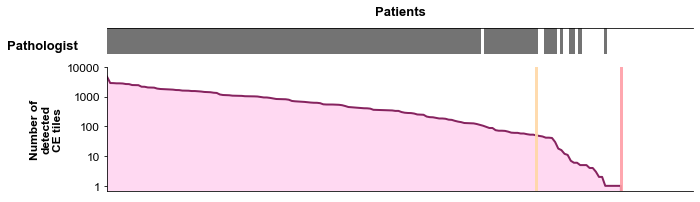

In [6]:
diagColormap = [[30/255, 120/255, 182/255],[232/255, 23/255, 30/255]]
qcColormap = [[1,1,1],[.45,.45,.45]]

pathCytoColormap = [[1,1,1],[231/255,134/255,133/255]]

fig = plt.figure(figsize=(10.5,3))

gs = gridspec.GridSpec(nrows=2, 
                       ncols=1, 
                       figure=fig, 
                       height_ratios=[0.17,0.83],
                       #width_ratios= [0.04, 0.41, 0.1, 0.04, 0.42],
                       hspace=0.18)

ax0 = fig.add_subplot(gs[0, 0])
#ax1.scatter(np.ones((len(mergedScores),1)),np.arange(0,len(mergedScores)),color=[qcColormap[gt] for gt in groundTruth],s=2)
ax0.bar(caseLabels,mergedScoresCalibration['dummyColumn'],color=[qcColormap[gt] for gt in qcGroundTruth],width=1.1)

ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.set_xticklabels(['' for tick in ax0.get_yticks()])
ax0.set_xlabel('Patients', fontsize=13)
ax0.set_ylabel('Pathologist',rotation=0, fontsize=13)
ax0.yaxis.set_label_coords(-0.11,0.05)
ax0.xaxis.set_label_coords(0.5,1.5)
#ax0.yaxis.set_label_position("left")
ax0.xaxis.tick_top()
ax0.xaxis.set_label_position('top') 
ax0.get_yaxis().set_ticks([])
ax0.get_xaxis().set_ticks([])
ax0.set_xlim(0,len(mergedScoresCalibration))
ax0.set_ylim(0,0.3)

ax1 = fig.add_subplot(gs[1, 0])
#ax1.scatter(np.ones((len(mergedScores),1)),np.arange(0,len(mergedScores)),color=[qcColormap[gt] for gt in groundTruth],s=2)

viridis = cm.get_cmap('Greens', 101)
fancyColormap = [viridis(x) for x in np.arange(0,10001)]
#[fancyColormap[10000] for gt in positiveTileCounts]
#ax1.bar(caseLabels,positiveTileCounts,color=[0.3,0.3,0.3],width=1.1)
ax1.plot(caseLabels,positiveTileCounts,color=[0.525, 0.137, 0.373])
plt.fill_between(caseLabels,positiveTileCounts, 0,
                 facecolor=[1.000, 0.851, 0.949], # The fill color
                 color=[1.000, 0.851, 0.949],       # The outline color
                 alpha=1)          # Transparency of the fill

ax1.set_yscale('log')
#ax1.yaxis.grid(True, which='minor')
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")
#ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xticklabels(['' for tick in ax1.get_yticks()])
#ax1.set_xlabel('AI ',rotation = -90)
ax1.set_ylabel('Number of\ndetected\nCE tiles', fontsize=12)
ax1.yaxis.set_label_position("left")
ax1.yaxis.set_tick_params(labelsize=12)
#ax1.get_xaxis().set_ticks([])
ax1.get_xaxis().set_visible(False)
ax1.set_xlim(0,len(mergedScoresCalibration))
ax1.set_ylim(0,10000)
ax1.yaxis.set_major_formatter(ScalarFormatter())
ax1.yaxis.set_minor_formatter(NullFormatter())
ax1.set_yticks([1,10,100,1000,10000])
ax1.set_yticklabels(['1','10','100','1000','10000'])
ax1.axvline(x=137,ymin=0,ymax=10000,lw=3,color=[1,215/255,165/255,.9])
ax1.axvline(x=164,ymin=0,ymax=10000,lw=3,color=[1,158/255,166/255,.9])

viridis = cm.get_cmap('Oranges', 101)
fancyColormap = [viridis(x) for x in np.arange(0,101)]


plt.savefig('../figures/qcPlot-horizontal-calibration.pdf',bbox_inches='tight')



In [7]:
df = pd.DataFrame(list(zip(qcGroundTruth, positiveTileCounts)), 
               columns =['Name', 'val']) 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

     Name   val
0       1  4752
1       1  2909
2       1  2891
3       1  2841
4       1  2840
5       1  2808
6       1  2690
7       1  2674
8       1  2490
9       1  2471
10      1  2463
11      1  2189
12      1  2177
13      1  2065
14      1  2054
15      1  2035
16      1  1891
17      1  1833
18      1  1814
19      1  1792
20      1  1778
21      1  1745
22      1  1692
23      1  1681
24      1  1621
25      1  1609
26      1  1603
27      1  1563
28      1  1563
29      1  1539
30      1  1506
31      1  1458
32      1  1441
33      1  1425
34      1  1372
35      1  1349
36      1  1197
37      1  1149
38      1  1140
39      1  1127
40      1  1093
41      1  1087
42      1  1082
43      1  1074
44      1  1046
45      1  1044
46      1  1038
47      1  1033
48      1  1023
49      1   982
50      1   950
51      1   948
52      1   919
53      1   882
54      1   843
55      1   839
56      1   837
57      1   825
58      1   797
59      1   724
60      1   705
61      

<ipython-input-8-f65627217c6b>:83: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(0,10000)
/Users/gehrun01/miniconda3/envs/cytosponge/lib/python3.8/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
<ipython-input-8-f65627217c6b>:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('../figures/diagPlot-horizontal-calibration.pdf',bbox_inches='tight')
<ipython-input-8-f65627217c6b>:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('../figures/diagPlot-horizontal-calibration.pdf',bbox_inches='tight')
/Users/gehrun01/miniconda3/envs/cytosponge/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible 

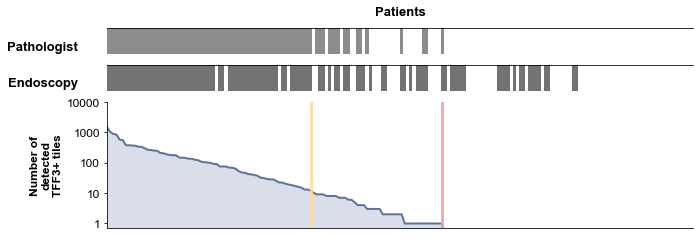

In [8]:
#diagColormap = [[30/255, 120/255, 182/255],[232/255, 23/255, 30/255]]
diagColormap = [[1,1,1],[.45,.45,.45]]
qcColormap = [[1,1,1],[105/255,180/255,64/255]]

pathCytoColormap = [[1,1,1],[.55,.55,.55]]

fig = plt.figure(figsize=(10.5,3.68))

gs = gridspec.GridSpec(nrows=3, 
                       ncols=1, 
                       figure=fig, 
                       height_ratios=[0.17,0.17,0.83],
                       #width_ratios= [0.04, 0.41, 0.1, 0.04, 0.42],
                       hspace=0.18)

ax0 = fig.add_subplot(gs[0, 0])
#ax1.scatter(np.ones((len(mergedScores),1)),np.arange(0,len(mergedScores)),color=[qcColormap[gt] for gt in groundTruth],s=2)
ax0.bar(caseLabels,mergedScoresCalibration['dummyColumn'],color=[pathCytoColormap[gt] for gt in pathCallCytosponge],width=1.1)

ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.set_xticklabels(['' for tick in ax0.get_yticks()])
ax0.set_xlabel('Patients', labelpad=1, fontsize=13)
ax0.set_ylabel('Pathologist', labelpad=1,rotation=0, fontsize=13)
ax0.yaxis.set_label_coords(-0.11,0.05)
ax0.xaxis.set_label_coords(0.5,1.5)
#ax0.yaxis.set_label_position("left")
ax0.xaxis.tick_top()
ax0.xaxis.set_label_position('top') 
ax0.get_yaxis().set_ticks([])
ax0.get_xaxis().set_ticks([])
ax0.set_xlim(0,len(mergedScoresCalibration))
ax0.set_ylim(0,0.3)

ax2 = fig.add_subplot(gs[1, 0])
#ax1.scatter(np.ones((len(mergedScores),1)),np.arange(0,len(mergedScores)),color=[qcColormap[gt] for gt in groundTruth],s=2)
ax2.bar(caseLabels,mergedScoresCalibration['dummyColumn'],color=[diagColormap[gt] for gt in groundTruth],width=1.1)

ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xticklabels(['' for tick in ax2.get_yticks()])
ax2.set_ylabel('Endoscopy',rotation=0, labelpad=1, fontsize=13)
ax2.yaxis.set_label_coords(-0.11,0.05)
ax2.xaxis.set_label_coords(0.5,1.5)
#ax0.yaxis.set_label_position("left")
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top') 
ax2.get_yaxis().set_ticks([])
ax2.get_xaxis().set_ticks([])
ax2.set_xlim(0,len(mergedScoresCalibration))
ax2.set_ylim(0,0.3)

ax1 = fig.add_subplot(gs[2, 0])
#ax1.scatter(np.ones((len(mergedScores),1)),np.arange(0,len(mergedScores)),color=[qcColormap[gt] for gt in groundTruth],s=2)

viridis = cm.get_cmap('Greens', 101)
fancyColormap = [viridis(x) for x in np.arange(0,10001)]

#ax1.bar(caseLabels,diagTileCounts,color=[.3,.3,.3])
ax1.plot(caseLabels,diagTileCounts,color=[0.369, 0.451, 0.620])
plt.fill_between(caseLabels,diagTileCounts, 0,
                 facecolor=[0.851, 0.871, 0.910], # The fill color
                 color=[0.851, 0.871, 0.910],       # The outline color
                 alpha=1)          # Transparency of the fill


ax1.set_yscale('log')
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")
#ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xticklabels(['' for tick in ax1.get_yticks()])
#ax1.set_xlabel('AI ',rotation = -90)
ax1.set_ylabel('Number of\ndetected\nTFF3+ tiles', fontsize=12)
ax1.yaxis.set_label_position("left")
ax1.yaxis.set_tick_params(labelsize=12)
#ax1.get_xaxis().set_ticks([])
ax1.get_xaxis().set_visible(False)
ax1.set_xlim(0,len(mergedScoresCalibration))
ax1.set_ylim(0,10000)
ax1.yaxis.set_major_formatter(ScalarFormatter())
ax1.yaxis.set_minor_formatter(NullFormatter())
ax1.axvline(x=65,ymin=0,ymax=10000,lw=3,color=[1,215/255,165/255,.9])
ax1.axvline(x=107,ymin=0,ymax=10000,lw=3,color=[1,158/255,166/255,.9])
ax1.set_yticks([1,10,100,1000,10000])
ax1.set_yticklabels(['1','10','100','1000','10000'])

viridis = cm.get_cmap('Oranges', 101)
fancyColormap = [viridis(x) for x in np.arange(0,101)]

plt.savefig('../figures/diagPlot-horizontal-calibration.pdf',bbox_inches='tight')



In [9]:
df = pd.DataFrame(list(zip(pathCallCytosponge, diagTileCounts)), 
               columns =['Name', 'val']) 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

     Name   val
0       1  1440
1       1  1014
2       1   865
3       1   828
4       1   568
5       1   547
6       1   370
7       1   369
8       1   362
9       1   356
10      1   331
11      1   328
12      1   293
13      1   263
14      1   258
15      1   246
16      1   243
17      1   207
18      1   201
19      1   186
20      1   177
21      1   174
22      1   173
23      1   146
24      1   144
25      1   142
26      1   133
27      1   133
28      1   124
29      1   120
30      1   107
31      1   103
32      1   101
33      1    97
34      1    90
35      1    89
36      1    74
37      1    74
38      1    74
39      1    68
40      1    67
41      1    63
42      1    52
43      1    47
44      1    46
45      1    42
46      1    41
47      1    39
48      1    37
49      1    32
50      1    31
51      1    29
52      1    28
53      1    28
54      1    25
55      1    22
56      1    22
57      1    20
58      1    19
59      1    18
60      1    17
61      

## Validation cohort

In [10]:
mergedScores = mergedScores[~mergedScores['Case'].isin(calibrationCohort)]
print(len(mergedScores))
diagTileCounts, caseLabels, positiveTileCounts, heImTileCounts, qcGroundTruth, groundTruth, pathCallCytosponge = zip(*sorted(zip(mergedScores[diagScoreColumn].tolist(), mergedScores['Case'].tolist(), mergedScores[qcScoreColumn].tolist(), mergedScores[imQcScoreColumn].tolist(), mergedScores['Cytosponge QC'].tolist(), mergedScores['Endoscopy (at least C1M3)'].tolist(), mergedScores['Cytosponge'].tolist()),reverse=True))

caseLabels = list(caseLabels)
#caseLabels.reverse()
diagTileCounts = list(diagTileCounts)
#diagTileCounts.reverse()
groundTruth = list(groundTruth)
#groundTruth.reverse()
qcGroundTruth = list(qcGroundTruth)
#qcGroundTruth.reverse()
positiveTileCounts = list(positiveTileCounts)
#positiveTileCounts.reverse()
pathCallCytosponge = list(pathCallCytosponge)
#pathCallCytosponge.reverse()
heImTileCounts = list(heImTileCounts)
#heImTileCounts.reverse()

positiveTileCounts, qcGroundTruth = zip(*sorted(zip(positiveTileCounts, qcGroundTruth),reverse=True))

525


<ipython-input-11-58026c1f4c45>:69: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(0,10000)
<ipython-input-11-58026c1f4c45>:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('../figures/qcPlot-horizontal.pdf',bbox_inches='tight')
<ipython-input-11-58026c1f4c45>:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('../figures/qcPlot-horizontal.pdf',bbox_inches='tight')
/Users/gehrun01/miniconda3/envs/cytosponge/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


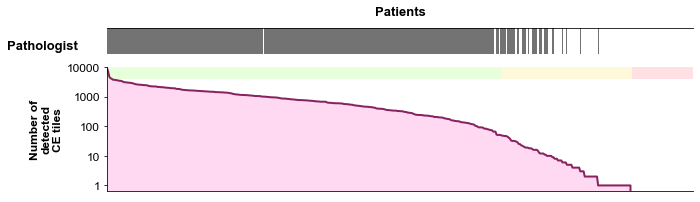

In [11]:
#diagColormap = [[30/255, 120/255, 182/255],[232/255, 23/255, 30/255]]
#diagColormap = [[106/255, 65/255, 133/255],[46/255, 165/255, 40/255]]
#qcColormap = [[253/255, 217/255, 50/255],[46/255, 165/255, 40/255]]

diagColormap = [[30/255, 120/255, 182/255],[232/255, 23/255, 30/255]]
#diagColormap = [[106/255, 65/255, 133/255],[46/255, 165/255, 40/255]]
#qcColormap = [[1,1,1],[105/255,180/255,64/255]]
qcColormap = [[1,1,1],[.45,.45,.45]]

pathCytoColormap = [[1,1,1],[231/255,134/255,133/255]]

fig = plt.figure(figsize=(10.5,3))

gs = gridspec.GridSpec(nrows=2, 
                       ncols=1, 
                       figure=fig, 
                       height_ratios=[0.17,0.83],
                       #width_ratios= [0.04, 0.41, 0.1, 0.04, 0.42],
                       hspace=0.18)

ax0 = fig.add_subplot(gs[0, 0])
#ax1.scatter(np.ones((len(mergedScores),1)),np.arange(0,len(mergedScores)),color=[qcColormap[gt] for gt in groundTruth],s=2)
ax0.bar(caseLabels,mergedScores['dummyColumn'],color=[qcColormap[gt] for gt in qcGroundTruth],width=1.1)

ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.set_xticklabels(['' for tick in ax0.get_yticks()])
ax0.set_xlabel('Patients', fontsize=13)
ax0.set_ylabel('Pathologist',rotation=0, fontsize=13)
ax0.yaxis.set_label_coords(-0.11,0.05)
ax0.xaxis.set_label_coords(0.5,1.5)
#ax0.yaxis.set_label_position("left")
ax0.xaxis.tick_top()
ax0.xaxis.set_label_position('top') 
ax0.get_yaxis().set_ticks([])
ax0.get_xaxis().set_ticks([])
ax0.set_xlim(0,len(mergedScores))
ax0.set_ylim(0,0.3)

ax1 = fig.add_subplot(gs[1, 0])
#ax1.scatter(np.ones((len(mergedScores),1)),np.arange(0,len(mergedScores)),color=[qcColormap[gt] for gt in groundTruth],s=2)

viridis = cm.get_cmap('Greens', 101)
fancyColormap = [viridis(x) for x in np.arange(0,10001)]
#[fancyColormap[10000] for gt in positiveTileCounts]
#ax1.bar(caseLabels,positiveTileCounts,color=[0.3,0.3,0.3],width=1.1)
ax1.plot(caseLabels,positiveTileCounts,color=[0.525, 0.137, 0.373])
plt.fill_between(caseLabels,positiveTileCounts, 0,
                 facecolor=[1.000, 0.851, 0.949], # The fill color
                 color=[1.000, 0.851, 0.949],       # The outline color
                 alpha=1)          # Transparency of the fill

ax1.set_yscale('log')
#ax1.yaxis.grid(True, which='minor')
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")
#ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xticklabels(['' for tick in ax1.get_yticks()])
#ax1.set_xlabel('AI ',rotation = -90)
ax1.set_ylabel('Number of\ndetected\nCE tiles', fontsize=12)
ax1.yaxis.set_label_position("left")
ax1.yaxis.set_tick_params(labelsize=12)
#ax1.get_xaxis().set_ticks([])
ax1.get_xaxis().set_visible(False)
ax1.set_xlim(0,len(mergedScores))
ax1.set_ylim(0,10000)
ax1.yaxis.set_major_formatter(ScalarFormatter())
ax1.yaxis.set_minor_formatter(NullFormatter())
ax1.set_yticks([1,10,100,1000,10000])
ax1.set_yticklabels(['1','10','100','1000','10000'])



res1 = next(x for x, val in enumerate(positiveTileCounts) if val < 50) 
rect = patches.Rectangle((0,4000),res1,10000,linewidth=0,facecolor=[218/255,1,195/255,.6])
ax1.add_patch(rect)

res2 =next(x for x, val in enumerate(positiveTileCounts) if val < 0.5) 
rect = patches.Rectangle((res1,4000),res2-res1,10000,linewidth=0,facecolor=[1,245/255,195/255,.6])
ax1.add_patch(rect)

res3 = len(positiveTileCounts)
rect = patches.Rectangle((res2,4000),res3-res2,10000,linewidth=0,facecolor=[1,158/255,166/255,.3])
ax1.add_patch(rect)


viridis = cm.get_cmap('Oranges', 101)
fancyColormap = [viridis(x) for x in np.arange(0,101)]
#axIm = fig.add_subplot(gs[0, 2])
#ax1.scatter(np.ones((len(mergedScores),1)),np.arange(0,len(mergedScores)),color=[qcColormap[gt] for gt in groundTruth],s=2)


#axIm.barh(caseLabels,mergedScores['dummyColumn'],color=[fancyColormap[gt] for gt in heImTileCounts])

#axIm.spines['bottom'].set_visible(False)
#axIm.spines['right'].set_visible(False)
#axIm.spines['top'].set_visible(False)
#axIm.set_yticklabels(['' for tick in axIm.get_yticks()])
#axIm.set_xlabel('DL-IM',rotation = -90)
#axIm.xaxis.set_label_position("top")
#axIm.get_xaxis().set_ticks([])
#remove_spines(axIm)
#axIm.get_yaxis().set_visible(False)
#axIm.get_xaxis().set_visible(False)
#axIm.set_ylim(0,len(mergedScores))

plt.savefig('../figures/qcPlot-horizontal.pdf',bbox_inches='tight')


<ipython-input-12-c4020182c2ca>:83: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(0,10000)
<ipython-input-12-c4020182c2ca>:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('../figures/diagPlot-horizontal.pdf',bbox_inches='tight')
<ipython-input-12-c4020182c2ca>:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('../figures/diagPlot-horizontal.pdf',bbox_inches='tight')
/Users/gehrun01/miniconda3/envs/cytosponge/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


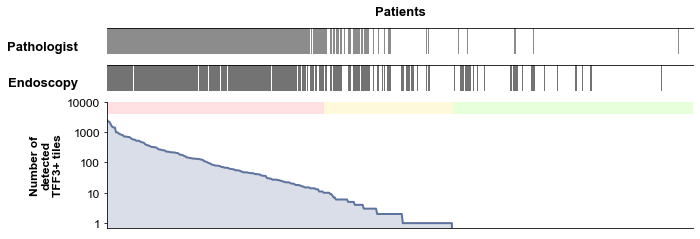

In [12]:
#diagColormap = [[30/255, 120/255, 182/255],[232/255, 23/255, 30/255]]
diagColormap = [[1,1,1],[.45,.45,.45]]
qcColormap = [[1,1,1],[105/255,180/255,64/255]]

pathCytoColormap = [[1,1,1],[.55,.55,.55]]

fig = plt.figure(figsize=(10.5,3.68))

gs = gridspec.GridSpec(nrows=3, 
                       ncols=1, 
                       figure=fig, 
                       height_ratios=[0.17,0.17,0.83],
                       #width_ratios= [0.04, 0.41, 0.1, 0.04, 0.42],
                       hspace=0.18)

ax0 = fig.add_subplot(gs[0, 0])
#ax1.scatter(np.ones((len(mergedScores),1)),np.arange(0,len(mergedScores)),color=[qcColormap[gt] for gt in groundTruth],s=2)
ax0.bar(caseLabels,mergedScores['dummyColumn'],color=[pathCytoColormap[gt] for gt in pathCallCytosponge],width=1.1)

ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.set_xticklabels(['' for tick in ax0.get_yticks()])
ax0.set_xlabel('Patients', labelpad=1, fontsize=13)
ax0.set_ylabel('Pathologist', labelpad=1,rotation=0, fontsize=13)
ax0.yaxis.set_label_coords(-0.11,0.05)
ax0.xaxis.set_label_coords(0.5,1.5)
#ax0.yaxis.set_label_position("left")
ax0.xaxis.tick_top()
ax0.xaxis.set_label_position('top') 
ax0.get_yaxis().set_ticks([])
ax0.get_xaxis().set_ticks([])
ax0.set_xlim(0,len(mergedScores))
ax0.set_ylim(0,0.3)

ax2 = fig.add_subplot(gs[1, 0])
#ax1.scatter(np.ones((len(mergedScores),1)),np.arange(0,len(mergedScores)),color=[qcColormap[gt] for gt in groundTruth],s=2)
ax2.bar(caseLabels,mergedScores['dummyColumn'],color=[diagColormap[gt] for gt in groundTruth],width=1.1)

ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xticklabels(['' for tick in ax2.get_yticks()])
ax2.set_ylabel('Endoscopy',rotation=0, labelpad=1, fontsize=13)
ax2.yaxis.set_label_coords(-0.11,0.05)
ax2.xaxis.set_label_coords(0.5,1.5)
#ax0.yaxis.set_label_position("left")
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top') 
ax2.get_yaxis().set_ticks([])
ax2.get_xaxis().set_ticks([])
ax2.set_xlim(0,len(mergedScores))
ax2.set_ylim(0,0.3)

ax1 = fig.add_subplot(gs[2, 0])
#ax1.scatter(np.ones((len(mergedScores),1)),np.arange(0,len(mergedScores)),color=[qcColormap[gt] for gt in groundTruth],s=2)

viridis = cm.get_cmap('Greens', 101)
fancyColormap = [viridis(x) for x in np.arange(0,10001)]

#ax1.bar(caseLabels,diagTileCounts,color=[.3,.3,.3])
ax1.plot(caseLabels,diagTileCounts,color=[0.369, 0.451, 0.620])
plt.fill_between(caseLabels,diagTileCounts, 0,
                 facecolor=[0.851, 0.871, 0.910], # The fill color
                 color=[0.851, 0.871, 0.910],       # The outline color
                 alpha=1)          # Transparency of the fill


ax1.set_yscale('log')
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")
#ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xticklabels(['' for tick in ax1.get_yticks()])
#ax1.set_xlabel('AI ',rotation = -90)
ax1.set_ylabel('Number of\ndetected\nTFF3+ tiles', fontsize=12)
ax1.yaxis.set_label_position("left")
ax1.yaxis.set_tick_params(labelsize=12)
#ax1.get_xaxis().set_ticks([])
ax1.get_xaxis().set_visible(False)
ax1.set_xlim(0,len(mergedScores))
ax1.set_ylim(0,10000)
ax1.yaxis.set_major_formatter(ScalarFormatter())
ax1.yaxis.set_minor_formatter(NullFormatter())
ax1.set_yticks([1,10,100,1000,10000])
ax1.set_yticklabels(['1','10','100','1000','10000'])



res1 = next(x for x, val in enumerate(diagTileCounts) if val < 11) 
rect = patches.Rectangle((0,4000),res1,10000,linewidth=0,facecolor=[1,158/255,166/255,.3])
ax1.add_patch(rect)

res2 = next(x for x, val in enumerate(diagTileCounts) if val < 0.5) 
rect = patches.Rectangle((res1,4000),res2-res1,10000,linewidth=0,facecolor=[1,245/255,195/255,.6])
ax1.add_patch(rect)

res3 = len(diagTileCounts)
rect = patches.Rectangle((res2,4000),res3-res2,10000,linewidth=0,facecolor=[218/255,1,195/255,.6])
ax1.add_patch(rect)






viridis = cm.get_cmap('Oranges', 101)
fancyColormap = [viridis(x) for x in np.arange(0,101)]
#axIm = fig.add_subplot(gs[0, 2])
#ax1.scatter(np.ones((len(mergedScores),1)),np.arange(0,len(mergedScores)),color=[qcColormap[gt] for gt in groundTruth],s=2)


#axIm.barh(caseLabels,mergedScores['dummyColumn'],color=[fancyColormap[gt] for gt in heImTileCounts])

#axIm.spines['bottom'].set_visible(False)
#axIm.spines['right'].set_visible( False)
#axIm.spines['top'].set_visible(False)
#axIm.set_yticklabels(['' for tick in axIm.get_yticks()])
#axIm.set_xlabel('DL-IM',rotation = -90)
#axIm.xaxis.set_label_position("top")
#axIm.get_xaxis().set_ticks([])
#remove_spines(axIm)
#axIm.get_yaxis().set_visible(False)
#axIm.get_xaxis().set_visible(False)
#axIm.set_ylim(0,len(mergedScores))

plt.savefig('../figures/diagPlot-horizontal.pdf',bbox_inches='tight')
